In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
#!pip3 install numpy --upgrade
#!pip3 install allennlp
#!pip3 install pytorch_transformers
#!pip3 install simpletransformers
#!pip3 install sentencepiece transformers

In [4]:
import scipy
import nltk
nltk.download('punkt')
import tarfile
from nltk.tokenize import word_tokenize
from allennlp import *
import torch
from pytorch_transformers import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from transformers import GPT2Tokenizer, GPT2Model, GPT2LMHeadModel
from transformers import AutoTokenizer 
from transformers import AutoModelForPreTraining  
from transformers import AutoModel 
from simpletransformers.language_representation import RepresentationModel
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
class Embeddings:
  
  def __init__(self, sentence_1, sentence_2):
    self.sentence_1 = sentence_1
    self.sentence_2 = sentence_2
    self.tokenized_sent_1 = word_tokenize(self.sentence_1)
    self.tokenized_sent_2 = word_tokenize(self.sentence_2)
  
    
  def get_gpt_embedding(self):
    '''Creates word embeddings of GPT
    returns: tensor
      Returns the GPT embeddings of the tokens of two sentences'''
    
    tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
    path = "/content/drive/MyDrive/checkpoint-950000"
    
    model = GPT2LMHeadModel.from_pretrained(path)

    indexed_token_1 = tokenizer.convert_tokens_to_ids(self.tokenized_sent_1)
    indexed_token_2 = tokenizer.convert_tokens_to_ids(self.tokenized_sent_2)
    
    tokens_tensor_1 = torch.tensor([indexed_token_1])
    tokens_tensor_2 = torch.tensor([indexed_token_2])

    gpt_embedding_1 = model(tokens_tensor_1)
    gpt_embedding_2 = model(tokens_tensor_2)

    return gpt_embedding_1, gpt_embedding_2

In [6]:
class Embedding2Array:  
    
  def gpt(self,embedding):
    ''' Creates the list of arrays of each corresponding word
    param
    embedding: tensor
    returns: list
      Returns the list of GPT embedding of each word 
    '''
    word_array = []

    for i in range(embedding[0].shape[1]):
      word_array.append(embedding[0][0][i].tolist())

    return word_array

In [7]:
class SimilarityFunctions:

  def __init__(self, sentence_1, sentence_2, word_array_1, word_array_2):
    self.sentence_1 = sentence_1
    self.sentence_2 = sentence_2
    self.word_array_1 = word_array_1
    self.word_array_2 = word_array_2
  
  def cosine_similarity_matrix(self):
    '''
    Creates a matrix depicting the cosine distances between the words of two sentences
    returns: array
      Similarity matrix of words in two sentences
    '''
    matrix = np.zeros((len(self.word_array_1), len(self.word_array_2)))

    for i in range(0, len(self.word_array_1)):
      for j in range(0, len(self.word_array_2)):
        matrix[i][j]= scipy.spatial.distance.cosine(self.word_array_1[i], self.word_array_2[j])
    return matrix.T
  
  def plot_similarity_matrix(self, title):
    '''Plot the similarity matrix of two sentences
    param:
    title: str
      Labels the plot with the corresponding title
    returns: None
    '''
    x_labels, y_labels = word_tokenize(self.sentence_1), word_tokenize(self.sentence_2)
    similarity_matrix = self.cosine_similarity_matrix()
    plt.figure(figsize = (16,5))
    sns.heatmap(similarity_matrix, vmin=0, vmax=1, xticklabels=x_labels, yticklabels=y_labels, cmap="YlGnBu", annot = True)
    plt.title(title)
    plt.show()    
  
  def get_similar_words(self):
    '''Prints similar word from second sentence for each word in the first sentence
    returns: list of similar words
    '''

    token_1 = word_tokenize(self.sentence_1)
    token_2 = word_tokenize(self.sentence_2)
    
    similarity_matrix = self.cosine_similarity_matrix()
    
    similar_word_dict = {}
    for row in range(0,len(similarity_matrix[0])):
      
      min_val = min(similarity_matrix.T[row]) #Here min value of transpose is found. To understand it print similarity matrix and find the logic
      index = (np.where(similarity_matrix.T[row] == min_val))[0]
      similar_word_list = []
      
      for i in range(0,len(index)):
        similar_word_list.append(token_2[index[i]])
      similar_word_dict[token_1[row]] = similar_word_list
      
    print('Similar words in two sentences are :', similar_word_dict)

In [8]:
class Main:
  def __init__(self, sentence_1, sentence_2):
    self.first_sentence = sentence_1
    self.second_sentence = sentence_2

  def gpt(self):
    '''Creates a list of GPT word embeddings of each sentence
    returns: list, list
      The list of embeddings of words of each sentence
    '''
    embed = Embeddings(self.first_sentence, self.second_sentence)
    embed2array = Embedding2Array()
    first_embedding, second_embedding = embed.get_gpt_embedding()
    first_array, second_array = embed2array.gpt(first_embedding), embed2array.gpt(second_embedding)
    return first_array, second_array

--------------------------------------------------------------------------------

In [9]:
class AnalyzeWordEmbeddings:
  def __init__(self,sentence_1, sentence_2):
    self.sentence_1 = sentence_1
    self.sentence_2 = sentence_2

  def gpt(self):
    '''Plots similarity matrix using GPT embeddings and returns similar words in both the sentences
    returns: dict
      A dictionary matching the similar words from one sentence to other using GPT embeddings
    '''    
    main = Main(self.sentence_1, self.sentence_2)
    array_1, array_2 = main.gpt()
    similarityfunc = SimilarityFunctions(self.sentence_1, self.sentence_2, array_1, array_2)
    similarity_matrix = similarityfunc.cosine_similarity_matrix()
    similarityfunc.plot_similarity_matrix('Similarity plot using GPT-2 Megatron PT-BR embeddings')
    similarityfunc.get_similar_words()


--------------------------------------------------------------------------------

In [10]:
first_sentence_1 = "Os homens estão cuidadosamente colocando as malas no porta-malas de um carro"
second_sentence_1 = "Os homens estão colocando bagagens dentro do porta-malas de um carro" 

In [11]:
first_sentence_2 = "Uma criança risonha está segurando uma pistola de água e sendo espirrada com água"
second_sentence_2 = "Uma criança está segurando uma pistola de água"

In [12]:
first_sentence_3 = "Um guitarrista tem cabelo loiro e esvoaçante"
second_sentence_3 = "Uma pessoa tem cabelo loiro e esvoaçante e está tocando violão"

In [13]:
first_sentence_4 = "O homem está fatiando a batata"
second_sentence_4 = "Batatas estão sendo fatiadas por um homem"

In [14]:
first_sentence_5 = "Um caminhão está rapidamente descendo o morro"
second_sentence_5 = "Um caminhão está descendo rapidamente um morro"

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

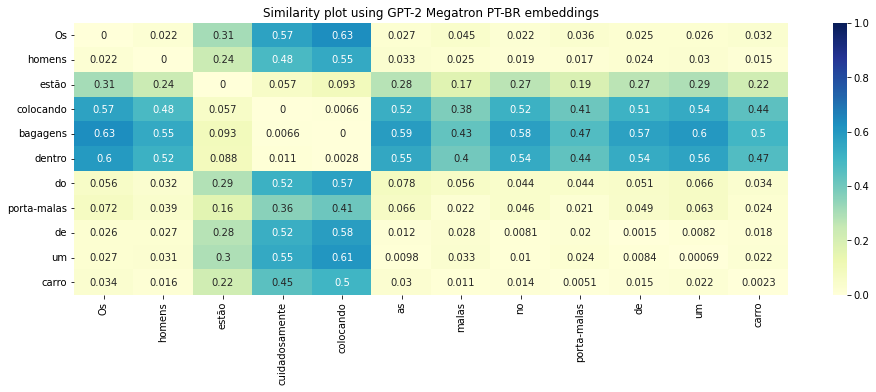

Similar words in two sentences are : {'Os': ['Os'], 'homens': ['homens'], 'estão': ['estão'], 'cuidadosamente': ['colocando'], 'colocando': ['bagagens'], 'as': ['um'], 'malas': ['carro'], 'no': ['de'], 'porta-malas': ['carro'], 'de': ['de'], 'um': ['um'], 'carro': ['carro']}


In [15]:
analyze_word_embed_1 = AnalyzeWordEmbeddings(first_sentence_1, second_sentence_1)
analyze_word_embed_1.gpt()

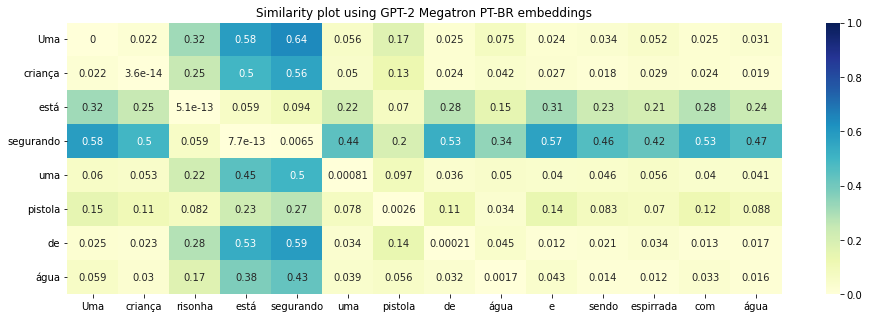

Similar words in two sentences are : {'Uma': ['Uma'], 'criança': ['criança'], 'risonha': ['está'], 'está': ['segurando'], 'segurando': ['segurando'], 'uma': ['uma'], 'pistola': ['pistola'], 'de': ['de'], 'água': ['água'], 'e': ['de'], 'sendo': ['água'], 'espirrada': ['água'], 'com': ['de']}


In [16]:
analyze_word_embed_2 = AnalyzeWordEmbeddings(first_sentence_2, second_sentence_2)
analyze_word_embed_2.gpt()

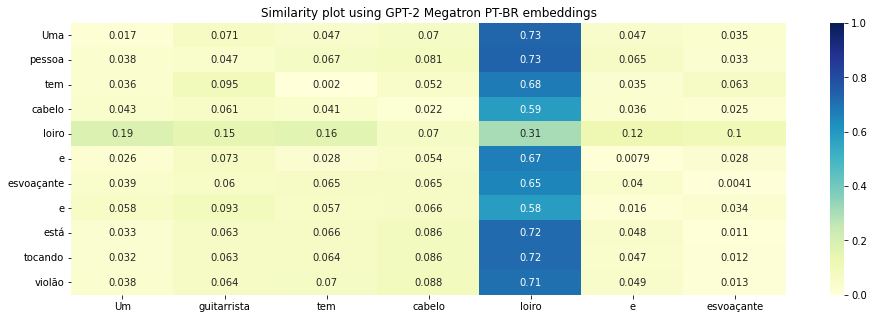

Similar words in two sentences are : {'Um': ['Uma'], 'guitarrista': ['pessoa'], 'tem': ['tem'], 'cabelo': ['cabelo'], 'loiro': ['loiro'], 'e': ['e'], 'esvoaçante': ['esvoaçante']}


In [17]:
analyze_word_embed_3 = AnalyzeWordEmbeddings(first_sentence_3, second_sentence_3)
analyze_word_embed_3.gpt()

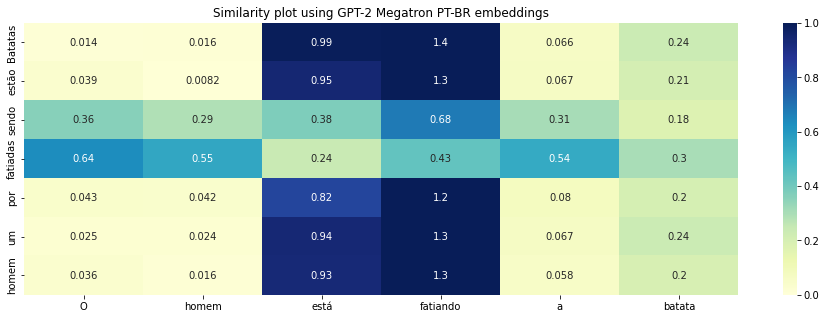

Similar words in two sentences are : {'O': ['Batatas'], 'homem': ['estão'], 'está': ['fatiadas'], 'fatiando': ['fatiadas'], 'a': ['homem'], 'batata': ['sendo']}


In [18]:
analyze_word_embed_4 = AnalyzeWordEmbeddings(first_sentence_4, second_sentence_4)
analyze_word_embed_4.gpt()

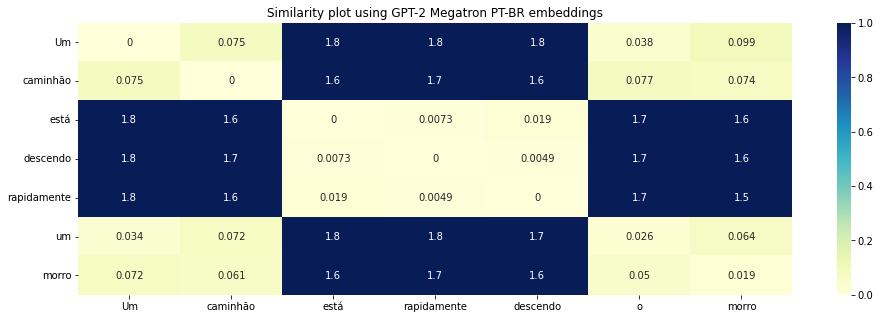

Similar words in two sentences are : {'Um': ['Um'], 'caminhão': ['caminhão'], 'está': ['está'], 'rapidamente': ['descendo'], 'descendo': ['rapidamente'], 'o': ['um'], 'morro': ['morro']}


In [19]:
analyze_word_embed_5 = AnalyzeWordEmbeddings(first_sentence_5, second_sentence_5)
analyze_word_embed_5.gpt()